In [2]:
from pymongo import MongoClient
import pandas as pd
import sys
import seaborn as sns
import numpy as np

# connect to MongoDB
print('Connecting to the database...', file=sys.stdout)
client = MongoClient('localhost', 27017)

# create/get database
db = client['upa']

Connecting to the database...


In [3]:
vaccination_basic_overview = pd.DataFrame(db['vaccination_basic_overview'].find({}, {
    "_id":1,
    "kraj_nazev":1,
    "vekova_skupina":1,
    "pohlavi":1,
    "pocet_davek":1,
    "vakcina": 1,
    "poradi_davky": 1

})).drop(["_id"], axis=1).set_index("kraj_nazev")

vaccination_basic_overview.to_csv("A3.csv")
vaccination_basic_overview





,vakcina,poradi_davky,vekova_skupina,pohlavi,pocet_davek
kraj_nazev,,,,,
Hlavní město Praha,Comirnaty,1,12-15,Z,13648
Hlavní město Praha,Comirnaty,1,12-15,M,14453
Hlavní město Praha,Comirnaty,1,16-17,Z,7050
Hlavní město Praha,Comirnaty,1,16-17,M,7056
Hlavní město Praha,Comirnaty,1,18-24,Z,19809
...,...,...,...,...,...
Moravskoslezský kraj,VAXZEVRIA,2,70-74,M,14
Moravskoslezský kraj,VAXZEVRIA,2,75-79,Z,25
Moravskoslezský kraj,VAXZEVRIA,2,75-79,M,13


In [68]:
pd.unique(vaccination_basic_overview.vakcina)

array(['Comirnaty', 'COVID-19 Vaccine Janssen', 'SPIKEVAX', 'VAXZEVRIA',
       nan], dtype=object)

In [95]:
vaccination_basic_overview.loc[(vaccination_basic_overview["Pohlavie"] != "Žena") &
                               (vaccination_basic_overview["Pohlavie"] != "Muž")]

,Názov kraja,vakcina,poradi_davky,Veková skupina,Pohlavie,Počet dávok


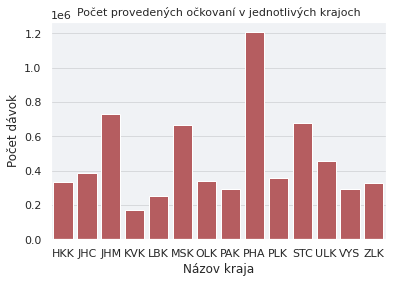

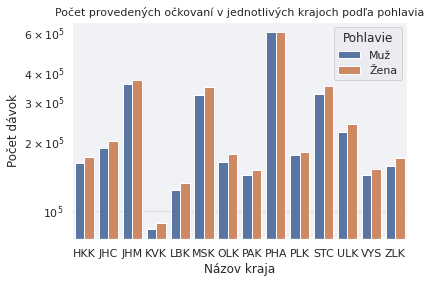

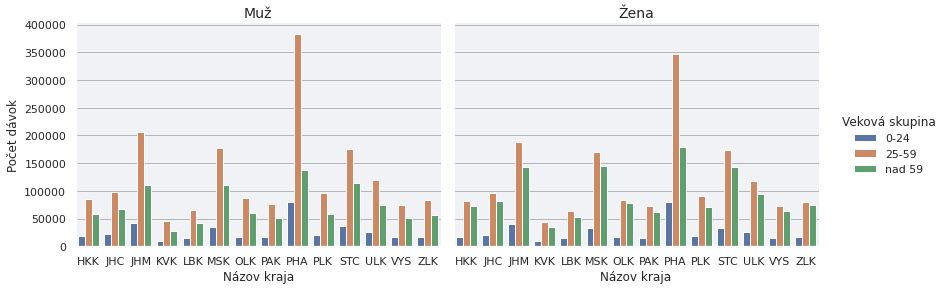

In [4]:
import matplotlib.pyplot as plt

vaccination_basic_overview = pd.read_csv("A3.csv")

group = {
    '0-11': "0-24",
    '12-15': "0-24", 
    '16-17': "0-24",
    '18-24': "0-24",
    '25-29': "25-59",
    '30-34': '25-59',
    '35-39': '25-59',
    '40-44': '25-59',
    '45-49': '25-59',
    '50-54': '25-59',
    '55-59': '25-59',
    '60-64': 'nad 59',
    '65-69': 'nad 59',
    '70-74': 'nad 59',
    '75-79': 'nad 59',
    '80+': 'nad 59'
}

regions_names_map = {
    'Hlavní město Praha': 'PHA',
    'Středočeský kraj':'STC',
    'Jihočeský kraj':'JHC',
    'Plzeňský kraj':'PLK',
    'Karlovarský kraj':'KVK',
    'Ústecký kraj':'ULK',
    'Liberecký kraj':'LBK',
    'Královéhradecký kraj':'HKK',
    'Pardubický kraj':'PAK',
    'Olomoucký kraj':'OLK',
    'Moravskoslezský kraj':'MSK',
    'Jihomoravský kraj':'JHM',
    'Zlínský kraj':'ZLK',
    'Kraj Vysočina':'VYS'
}

gender_map = {
    'Z': 'Žena',
    'M': 'Muž'
}

vaccination_basic_overview = vaccination_basic_overview.assign(vekova_skupina=vaccination_basic_overview.vekova_skupina.map(group))
vaccination_basic_overview = vaccination_basic_overview.assign(kraj_nazev=vaccination_basic_overview.kraj_nazev.map(regions_names_map))
vaccination_basic_overview = vaccination_basic_overview.assign(pohlavi=vaccination_basic_overview.pohlavi.map(gender_map))
vaccination_basic_overview = vaccination_basic_overview.rename({
    'kraj_nazev': 'Názov kraja',
    'vekova_skupina': 'Veková skupina',
    'pohlavi': 'Pohlavie',
    'pocet_davek': 'Počet dávok'
}, axis=1)

vaccination_basic_overview["Pohlavie"] = vaccination_basic_overview["Pohlavie"].fillna("Neznáme")
vaccination_basic_overview = vaccination_basic_overview.drop(
    vaccination_basic_overview[
        ((vaccination_basic_overview["vakcina"] == 'Comirnaty') & (vaccination_basic_overview["poradi_davky"] < 2)) |
        ((vaccination_basic_overview["vakcina"] == 'COVID-19 Vaccine Janssen') & (vaccination_basic_overview["poradi_davky"] < 1)) |
        ((vaccination_basic_overview["vakcina"] == 'SPIKEVAX') & (vaccination_basic_overview["poradi_davky"] < 2)) |
        ((vaccination_basic_overview["vakcina"] == 'VAXZEVRIA') & (vaccination_basic_overview["poradi_davky"] < 2)) |
        ((vaccination_basic_overview["poradi_davky"] > 2)) | 
        ((vaccination_basic_overview["Pohlavie"] == "Neznáme"))].index)



total_vaccination_basic_overview = vaccination_basic_overview.groupby(["Názov kraja"])["Počet dávok"].sum().reset_index()

sns.set()


ax = sns.barplot(data=total_vaccination_basic_overview, x="Názov kraja", y="Počet dávok", color='r')
ax.set_title("Počet provedených očkovaní v jednotlivých krajoch", fontsize=11.0)
ax.grid(axis="y", color="black", alpha=.2, linewidth=.5, zorder=1)
ax.set_facecolor("#f0f2f5")

plt.show()

total_gender_vaccination_basic_overview = vaccination_basic_overview.groupby(["Názov kraja", "Pohlavie"])["Počet dávok"].sum().reset_index()
ax = sns.barplot(data=total_gender_vaccination_basic_overview, x="Názov kraja", y="Počet dávok", hue="Pohlavie")
ax.set_title("Počet provedených očkovaní v jednotlivých krajoch podľa pohlavia", fontsize=11.0)
ax.grid(axis="y", color="black", alpha=.2, linewidth=.5, zorder=1)
ax.set_facecolor("#f0f2f5")
ax.set_yscale('log')

plt.show()

total_gender_age_vaccination_basic_overview = vaccination_basic_overview.groupby(["Názov kraja", "Pohlavie", "Veková skupina"])["Počet dávok"].sum().reset_index()
plot = sns.catplot(data=total_gender_age_vaccination_basic_overview, x="Názov kraja", y="Počet dávok", col="Pohlavie", hue="Veková skupina", col_wrap=2, kind="bar",height=4.2, aspect=1.4, zorder=2)

plot.set_titles("{col_name}", size=14).tight_layout()

for ax in plot.axes.flatten():
    ax.grid(axis="y", color="black", alpha=.5, linewidth=.5, zorder=1)
    ax.set_facecolor("#f0f2f5")

plt.show()


In [28]:
df = pd.DataFrame(db['population_villages'].find()).drop(['_id'], axis=1)

df = df.groupby(["vuzemi_txt"])["hodnota"].sum().sort_values(ascending=False).reset_index()
list(df.head(51)["vuzemi_txt"])

fifty_most_populated_towns = [
    'Praha', 'Brno', 'Ostrava', 'Plzeň',
    'Olomouc', 'České Budějovice','Černošice',
    'Hradec Králové','Liberec','Pardubice','Kladno',
    'Ústí nad Labem','Brandýs nad Labem-Stará Boleslav',
    'Mladá Boleslav','Frýdek-Místek','Teplice','Jihlava',
    'Opava','Zlín','Prostějov','Znojmo','Uherské Hradiště',
    'Karlovy Vary','Havířov','Kolín','Chrudim','Chomutov',
    'Tábor','Přerov','Česká Lípa','Děčín','Sokolov','Třebíč',
    'Most','Říčany','Šlapanice','Příbram','Šumperk','Kroměříž',
    'Beroun','Vsetín','Trutnov','Karviná','Benešov','Hodonín',
    'Náchod','Břeclav','Litoměřice','Nýřany','Blansko', 'Jablonec nad Nisou'
 ]

In [65]:
from datetime import datetime
my_date = datetime.strptime("31/12/20", '%d/%m/%y')

hell1 = pd.DataFrame(db['villages'].aggregate([
    {"$match": { "orp_nazev": { "$in": fifty_most_populated_towns}, "$expr": { "$lt": [{ "$toDate": my_date.isoformat()}, "$datum"]}}},
    { "$group": {
        "_id": {
          "orp_nazev": "$orp_nazev",
          "truncatedOrderDate": {"$dateTrunc": { "date": "$datum", "unit": "quarter"}}
          },
        "total": { "$sum": "$nove_pripady" }
  }},
  {"$project":{
      "_id": "$_id.truncatedOrderDate",
      "orp_nazev": "$_id.orp_nazev",
      "pocet_nakazených": "$total",
  }},
])).sort_values("orp_nazev", ascending=False)

hell2 = pd.DataFrame(db['vaccination_geographic'].aggregate([
    {"$match": { "orp_bydliste": { "$in": fifty_most_populated_towns}, "$expr": { "$lt": [{ "$toDate": my_date.isoformat()}, "$datum"]}}},
    { "$group": {
        "_id": {
          "orp_nazev": "$orp_bydliste",
          "truncatedOrderDate": {"$dateTrunc": { "date": "$datum", "unit": "quarter"}}
          },
        "total": { "$sum": {
          "$cond": {
            "if": {
               "$or": [
                 {"$and": [{"$eq": ["$vakcina", 'Comirnaty']}, {"$gte": ["$poradi_davky", 2]}]},
                 {"$and": [{"$eq": ["$vakcina", 'COVID-19 Vaccine Janssen']}, {"$gte": ["$poradi_davky", 1]}]},
                 {"$and": [{"$eq": ["$vakcina", 'SPIKEVAX']}, {"$gte": ["$poradi_davky", 2]}]},
                 {"$and": [{"$eq": ["$vakcina", 'VAXZEVRIA']}, {"$gte": ["$poradi_davky", 2]}]}
               ]
              }, "then": "$pocet_davek", "else": 0
            } 
          } 
        }
  }},
  {"$project":{
      "_id": "$_id.truncatedOrderDate",
      "orp_nazev": "$_id.orp_nazev",
      "pocet_ockovanych": "$total",
  }},
])).sort_values("orp_nazev", ascending=False)

hell = pd.DataFrame(db['population_villages'].aggregate([
    {"$match": { "vuzemi_txt": { "$in": fifty_most_populated_towns}, }},
    {
      "$group": {
          "_id": "$vuzemi_txt",
          "0-14": { "$sum": { "$cond": { "if": { "$and": [{"$gte": [ "$vek", 0 ]}, {"$lte": [ "$vek", 14 ]}]} ,"then": "$hodnota", "else": 0 } } },
          "15-59": { "$sum": { "$cond": { "if": { "$and": [{"$gte": [ "$vek", 15 ]}, {"$lte": [ "$vek", 59 ]}]} ,"then": "$hodnota", "else": 0 } } },
          "59 a viac": { "$sum": { "$cond": { "if": { "$gte": [ "$vek", 60 ] } ,"then": "$hodnota", "else": 0 } } },
        }
    }
])).rename({"_id": "orp_nazev"}, axis=1).sort_values(by=["orp_nazev"], ascending=False)
hell1 = hell1.pivot_table('pocet_nakazených', ["orp_nazev"], '_id').reset_index()
hell2 = hell2.pivot_table('pocet_ockovanych', ["orp_nazev"], '_id').reset_index()

hell1 = hell1.rename({
  datetime.strptime("1/1/21", '%d/%m/%y'): "pocet_nakazenych_Q1",
  datetime.strptime("1/4/21", '%d/%m/%y'): "pocet_nakazenych_Q2",
  datetime.strptime("1/7/21", '%d/%m/%y'): "pocet_nakazenych_Q3",
  datetime.strptime("1/10/21", '%d/%m/%y'): "pocet_nakazenych_Q4"
}, axis=1)

hell2 = hell2.rename({
  datetime.strptime("1/1/21", '%d/%m/%y'): "pocet_ockovanich_Q1",
  datetime.strptime("1/4/21", '%d/%m/%y'): "pocet_ockovanich_Q2",
  datetime.strptime("1/7/21", '%d/%m/%y'): "pocet_ockovanich_Q3",
  datetime.strptime("1/10/21", '%d/%m/%y'): "pocet_ockovanich_Q4"
}, axis=1)


hell3 = hell1.merge(hell2[["orp_nazev", "pocet_ockovanich_Q1", "pocet_ockovanich_Q2", "pocet_ockovanich_Q3", "pocet_ockovanich_Q4"]], how='left')
hell4 = hell3.merge(hell[["orp_nazev", "0-14", "15-59", "59 a viac"]], how='left')

hell4

,orp_nazev,pocet_nakazenych_Q1,pocet_nakazenych_Q2,pocet_nakazenych_Q3,pocet_nakazenych_Q4,pocet_ockovanich_Q1,pocet_ockovanich_Q2,pocet_ockovanich_Q3,pocet_ockovanich_Q4,0-14,15-59,59 a viac
0,Benešov,5461,679,134,3603,2639,15994,18141,11739,10634,34629,16072
1,Beroun,4935,840,305,4433,3797,16523,17870,12684,12440,38647,15000
2,Blansko,4135,749,93,4019,3459,14942,12348,10647,9586,31968,15491
3,Brandýs nad Labem-Stará Boleslav,9405,1146,399,8598,5132,24773,34568,21291,24617,69030,21807
4,Brno,20624,3578,992,29831,24920,98975,89203,82330,59790,221211,101404
5,Břeclav,4037,434,106,3670,3254,14815,12871,11354,8851,34565,16188
6,Chomutov,4807,1040,120,3882,3039,21162,19106,18526,13080,48655,19818
7,Chrudim,7983,1065,170,5213,4100,21709,20676,17124,13321,47739,22632
8,Děčín,7049,940,63,2576,1943,21840,17412,14073,12160,43336,20635
9,Frýdek-Místek,7340,1682,326,8928,4436,30906,23119,21329,17942,65646,28701


In [66]:
from sklearn.preprocessing import MinMaxScaler

check_outliers = [
        "pocet_nakazenych_Q1", "pocet_nakazenych_Q2", "pocet_nakazenych_Q3", "pocet_nakazenych_Q4",
        "pocet_ockovanich_Q2", "pocet_ockovanich_Q2", "pocet_ockovanich_Q2", "pocet_ockovanich_Q2",
        "0-14", "15-59", "59 a viac"
    ]

#odlahle hodnoty
for col in check_outliers:
    Q1 = hell4[col].quantile(0.25)
    Q3 = hell4[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"[{Q1 - 1.5 * IQR}; {(Q3 + 1.5 * IQR)}]")
    lower_bound = hell4[col].quantile(0.10)
    upper_bound = hell4[col].quantile(0.90)
    hell4[col] = np.where(hell4[col] < lower_bound, lower_bound, hell4[col])
    hell4[col] = np.where(hell4[col] > upper_bound, upper_bound, hell4[col])
    hell4[col] = hell4[col].astype("int64")

# normalizacia poctu nakazených v prvom kvartáli
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(pd.DataFrame(hell4["pocet_nakazenych_Q1"]))
hell4["pocet_nakazenych_Q1"] = pd.DataFrame(normalized_data, columns=["pocet_nakazenych_Q1"])

# diskretizácia počtu vekov v 0-14 kategórii
hell4["0-14"] = pd.cut(hell4["0-14"], bins=10)

hell4





[-1260.375; 15162.625]
[-241.25; 2444.75]
[-152.875; 510.125]
[-1242.75; 12089.25]
[-712.5; 49073.5]
[-712.5; 49073.5]
[-712.5; 49073.5]
[-712.5; 49073.5]
[-956.25; 30005.75]
[-3947.375; 109445.625]
[1932.0; 43416.0]


,orp_nazev,pocet_nakazenych_Q1,pocet_nakazenych_Q2,pocet_nakazenych_Q3,pocet_nakazenych_Q4,pocet_ockovanich_Q1,pocet_ockovanich_Q2,pocet_ockovanich_Q3,pocet_ockovanich_Q4,0-14,15-59,59 a viac
0,Benešov,0.138944,679,134,3603,2639,15994,18141,11739,"(9481.984, 11301.6]",34629,16072
1,Beroun,0.084158,840,305,4433,3797,16523,17870,12684,"(11301.6, 13103.2]",38647,15477
2,Blansko,0.000833,749,93,4019,3459,15993,12348,10647,"(9481.984, 11301.6]",34557,15491
3,Brandýs nad Labem-Stará Boleslav,0.549734,1146,399,8598,5132,24773,34568,21291,"(23912.8, 25714.4]",69030,21807
4,Brno,1.000000,1762,416,10628,24920,38863,89203,82330,"(25714.4, 27516.0]",89829,41607
5,Břeclav,0.000000,506,106,3670,3254,15993,12871,11354,"(9481.984, 11301.6]",34565,16188
6,Chomutov,0.070826,1040,120,3882,3039,21162,19106,18526,"(11301.6, 13103.2]",48655,19818
7,Chrudim,0.401625,1065,170,5213,4100,21709,20676,17124,"(13103.2, 14904.8]",47739,22632
8,Děčín,0.304343,940,72,2690,1943,21840,17412,14073,"(11301.6, 13103.2]",43336,20635
9,Frýdek-Místek,0.334653,1682,326,8928,4436,30906,23119,21329,"(16706.4, 18508.0]",65646,28701
